In [136]:
import seaborn
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
seaborn.set()



In [137]:
# Import and parse data
df  = pd.read_csv("data.csv", sep = ';', parse_dates=["date"]).set_index('date')

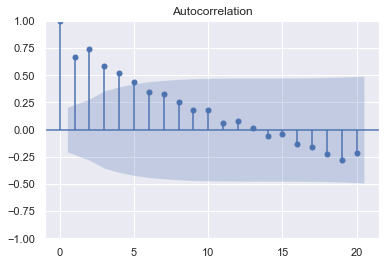

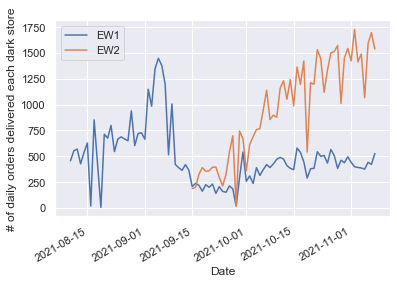

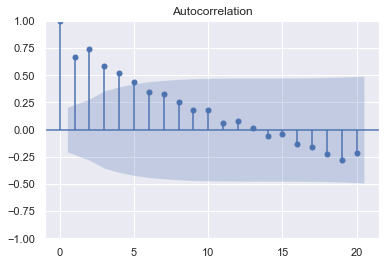

In [138]:
# Plot raw data
# Clear trends but we can apply some smoothing
df.plot()
plt.ylabel('# of daily orders delivered each dark store')
plt.xlabel('Date')
plot_acf(df['EW1'])
# Auto correlation in the critical interval after 7 days. Lets use 7 day moving average.

Text(0.5, 0, 'Date')

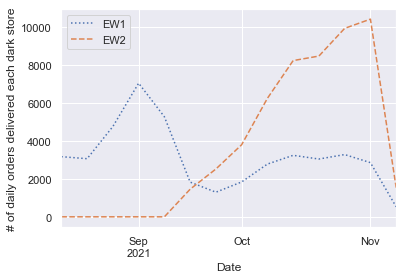

In [139]:
# Weekly resampling
weekly = df.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('# of daily orders delivered each dark store')
plt.xlabel('Date')


In [140]:
# Moving average to smooth out results
df.rolling(7, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])

<AxesSubplot:xlabel='date'>

In [ ]:
model1 = ARIMA(df.EW1,order=(2,0,5))
model1_fit = model1.fit()
model1_fit.summary()

# Assuming indepenence because EW1 pre and prior to EW2 are seemingly independent
model2 = ARIMA(df.EW2,order=(2,0,5))
model2_fit = model2.fit()
model2_fit.summary()

/Users/naadir/Desktop/airlift-case-study/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/naadir/Desktop/airlift-case-study/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/naadir/Desktop/airlift-case-study/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/naadir/Desktop/airlift-case-study/venv/lib/py

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    EW2   No. Observations:                   90
Model:                 ARIMA(2, 0, 5)   Log Likelihood                -373.229
Date:                Sun, 14 Nov 2021   AIC                            764.459
Time:                        21:59:49   BIC                            786.957
Sample:                             0   HQIC                           773.532
                                 - 90                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        955.6915    507.910      1.882      0.060     -39.793    1951.176
ar.L1          0.0610      0.083      0.732      0.464      -0.102       0.224
ar.L2          0.9122      0.090     10.176      0.000       0.737       1.088
ma.L1          0.0565      0.293      0.193      0.847      -0.517       0.630
ma.L2         -0.7965      0.236     -3.380      0.001      -1.258      -0.335
ma.L3         -0.0199      0.188     -0.106      0.916      -0.389       0.349
ma.L4          0.2316      0.194      1.193      0.233      -0.149       0.612
ma.L5          0.3985      0.155      2.577      0.010       0.095       0.702
sigma2      4.168e+04      0.005   8.28e+06      0.000    4.17e+04    4.17e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                67.30
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):                inf   Skew:                            -0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.29e+25. Standard errors may be unstable.
"""

In [ ]:
ew1 = model1_fit.predict(start=88,end=95)
ew2 = model2_fit.predict(start=88,end=95)
ew1,ew2

/Users/naadir/Desktop/airlift-case-study/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/naadir/Desktop/airlift-case-study/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


(88    414.566098
 89    452.661710
 90    475.366007
 91    516.438226
 92    501.066991
 93    507.472064
 94    499.626924
 95    502.156458
 Name: predicted_mean, dtype: float64,
 88    1404.494266
 89    1508.602489
 90    1369.350652
 91    1414.787874
 92    1482.816805
 93    1527.999722
 94    1482.635196
 95    1509.904747
 Name: predicted_mean, dtype: float64)